In [3]:
from donaldson import *
from donaldson_eval_helpers import abs_error, rel_error
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
def donaldson_iter(k, max_iterations=10, generator=fermat_quintic.generate_quintic_point_weights):
    point_weights = generator(k)
    n_k = fermat_quintic.basis_size(k)
    n_p = len(point_weights)

    volume_cy = (1 / n_p) * np.sum(point_weights['weight']) 
    t_operator_func = lambda h_new : (n_k / (n_p * volume_cy)) * t_operator(k, n_k, h_new, point_weights)

    h_n = initial_balanced_metric(n_k)
    for i in range(0, max_iterations):
        h_new = np.linalg.inv(t_operator_func(h_n)).T 
        yield h_n, h_new
        h_n = h_new

In [19]:
k_max = 4
max_iterations = 9
iters = list(range(0, max_iterations))

rel_err = np.zeros((k_max, max_iterations))
for k in range(0, k_max):
    for i, (h_n, h_new) in enumerate(donaldson_iter(k+1, max_iterations)):
        rel_err[k][i] = rel_error(h_n, h_new)


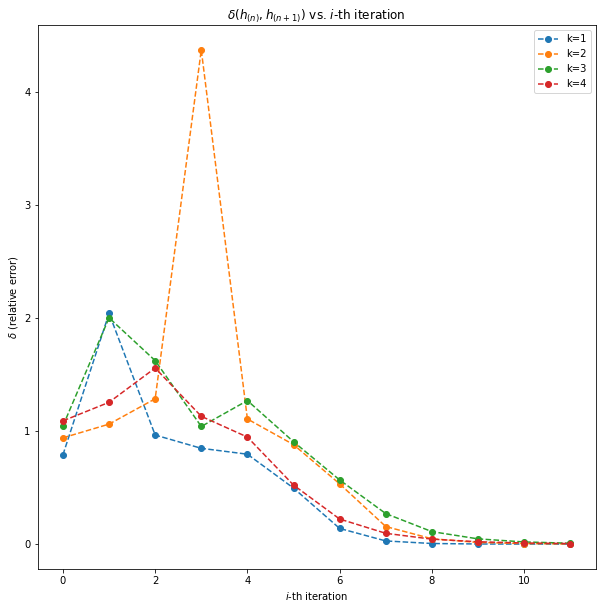

In [39]:
iters = list(range(0, max_iterations))
plt.figure(figsize=(10,10))
for k in range(0, k_max):
    plt.plot(iters, rel_err[k], linestyle='dashed', marker='o')#, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue')
plt.xlabel(r'$i$-th iteration')
plt.ylabel(r'$\delta$ (relative error)')
plt.title(r'$\delta(h_{(n)}, h_{(n+1)})$ vs. $i$-th iteration')
plt.legend(['k=%i' % (k+1) for k in range(0, k_max)])
plt.show()